In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import svm

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio

# Load Dataset 2

In [2]:
features = pd.read_csv('heart.csv')
features.head(5)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Print dataframe dimensions (should be 863x3 matrix):

In [3]:
print('The shape of our features is:', features.shape)

The shape of our features is: (303, 14)


In [4]:
# Descriptive statistics for each column
features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#  Visualizing Dataset 2

As we can see, we must find a non-linear decision boundrary.

In [5]:
features.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Count

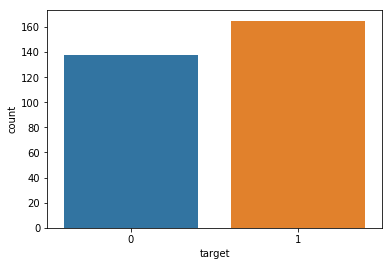

In [6]:
sns.countplot(features['target'], label = "Count")

In [7]:
X = features.drop(['target'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


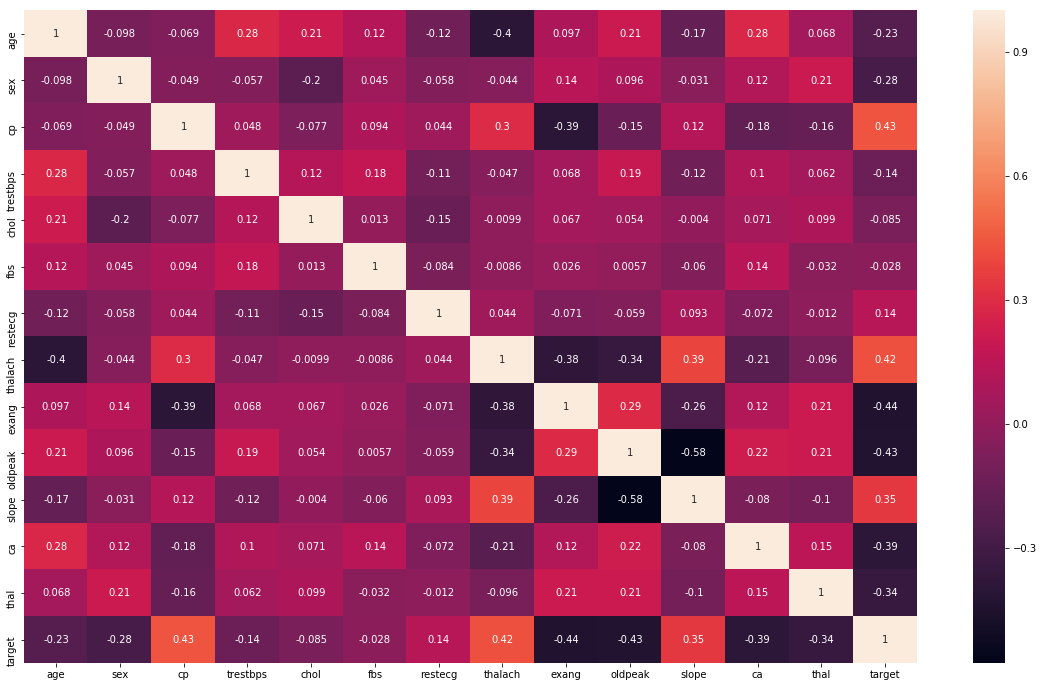

In [8]:
plt.figure(figsize=(20,12)) 
sns.heatmap(features.corr(), annot=True)

In [9]:
y = features['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [11]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (242, 13)


The size of our testing "X" (input features) is (61, 13)


The size of our training "y" (output feature) is (242,)


The size of our testing "y" (output features) is (61,)


# scikit-learn Gaussian Kernel

## Set up the kernel: 

In [65]:
#svc = svm.SVC(C=0.1,kernel='sigmoid',gamma='scale',probability=True)

nusvc = svm.NuSVC(nu=0.55,gamma='scale',kernel='poly',degree=5)

Score for fitting data with Gaussian Kernel is:

In [71]:
#svc.fit(X_train, y_train)
#print(svc.score(X_train, y_train))

nusvc.fit(X_train, y_train)
print(nusvc.score(X_train, y_train))

0.8471074380165289


In [74]:
#y_predict = svc.predict(X_test)
#print(y_predict)

y_predict_nu = nusvc.predict(X_test)
error=abs(y_predict_nu-y_test)
print(error.head(10))

222    1
117    0
208    0
77     0
28     0
122    0
163    0
214    0
200    1
47     0
Name: target, dtype: int64


In [75]:
from sklearn import metrics
#print(metrics.classification_report(y_predict, y_test))

print(metrics.classification_report(y_predict_nu, y_test))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.87      0.82      0.85        40

   micro avg       0.80      0.80      0.80        61
   macro avg       0.78      0.79      0.79        61
weighted avg       0.81      0.80      0.81        61



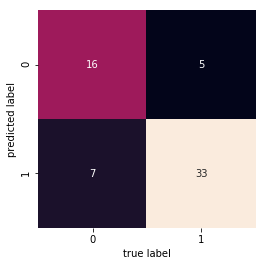

In [76]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict_nu)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');